# Pset2.6

In [158]:
from __future__ import print_function, division
import time, os, json
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
def readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def nb_train(matrix, category):
    M = matrix.shape[0]
    N = matrix.shape[1]

    size_vocab = N
    
    count_not_spam = np.sum(category == 0)
    count_spam = np.sum(category == 1)

    word_count_not_spam = np.sum(matrix[category == 0], axis=0)
    word_count_spam = np.sum(matrix[category == 1], axis=0)

    word_given_not_spam = np.log((word_count_not_spam + 1)/(size_vocab + np.sum(word_count_not_spam)))
    word_given_spam = np.log((word_count_spam + 1)/(size_vocab + np.sum(word_count_spam)))

    prob_not_spam = np.log(count_not_spam / M)
    prob_spam = np.log(count_spam / M)
    
    return word_given_spam, word_given_not_spam, prob_spam, prob_not_spam

def nb_test(matrix, state):
    word_given_spam, word_given_not_spam, prob_spam, prob_not_spam = state
    jll_not_spam = prob_not_spam + np.dot(matrix, word_given_not_spam.T)
    jll_spam = prob_spam + np.dot(matrix, word_given_spam.T)
    
    return jll_spam > jll_not_spam

def evaluate(output, label):
    error = np.sum(output != label) * 1. / len(output)
    print('Error: %1.4f' % error)
    return error

In [144]:
trainMatrix, tokenlist, trainCategory = readMatrix('spam_data/MATRIX.TRAIN')
testMatrix, tokenlist, testCategory = readMatrix('spam_data/MATRIX.TEST')

In [145]:
state = nb_train(trainMatrix, trainCategory)

In [151]:
output = nb_test(testMatrix, state)

## 6 a

In [152]:
error = evaluate(output, testCategory)

Error: 0.0163


## 6 b

In [148]:
word_given_spam, word_given_not_spam, prob_spam, prob_not_spam = state
ratios = np.exp(word_given_spam - word_given_not_spam)
print(np.asarray(tokenlist)[np.argsort(ratios)[-5:]])

['valet' 'ebai' 'unsubscrib' 'spam' 'httpaddr']


## 6 c

Error: 0.0387
Error: 0.0262
Error: 0.0262
Error: 0.0187
Error: 0.0175
Error: 0.0163


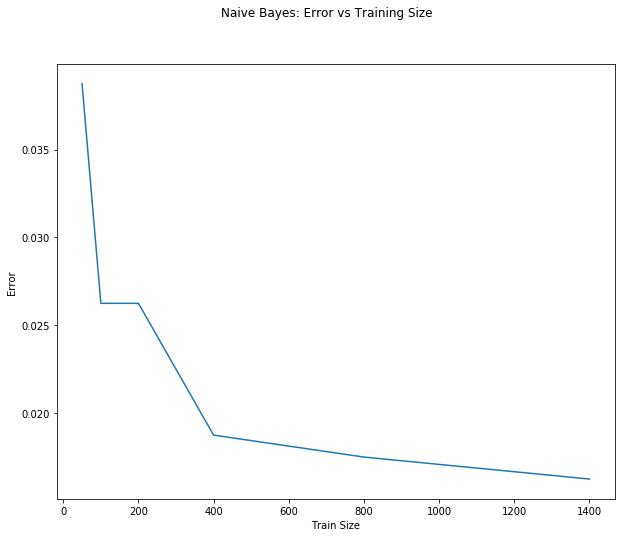

In [149]:
nb_errors = []
sizes = ['50', '100', '200', '400', '800', '1400']
for size in sizes:
    tm, tl, tc = readMatrix('spam_data/MATRIX.TRAIN.'+size)
    output = nb_test(testMatrix, nb_train(tm, tc))
    nb_errors.append(evaluate(output, testCategory))

plt.figure()
plt.ylabel('Error')
plt.xlabel('Train Size')
plt.plot(sizes, nb_errors)
plt.suptitle('Naive Bayes: Error vs Training Size')
plt.show()

#### A training set size of 1400 produces the lowest test error for Naive Bayes.

## 6 d

In [64]:
import spam_data.svm as svm
## Note that a very small modification to svm.py
## was made to have the main function return the
## error and take in the size.
## Also, changes were made for compatibility with
## Python 3 (xrange, etc.).
## No other modifications were made, and did not
## seem worth making you read through.

Error: 0.0200
Error: 0.0150
Error: 0.0037
Error: 0.0037
Error: 0.0000
Error: 0.0000


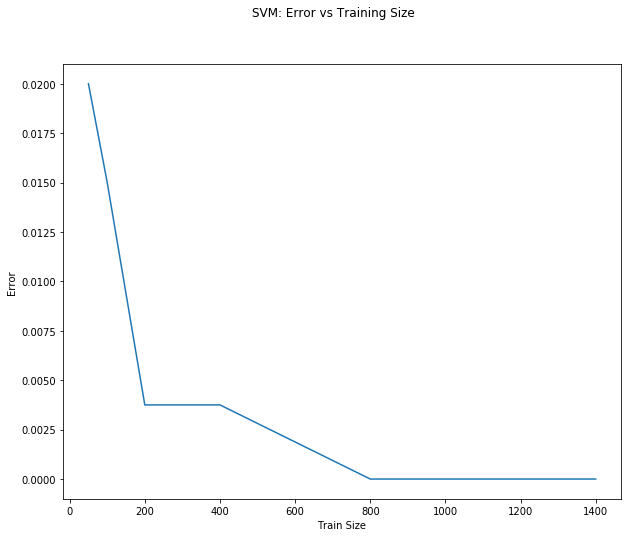

In [154]:
svm_errors = []
for size in sizes:
    svm_errors.append(svm.main(size))

plt.figure()
plt.ylabel('Error')
plt.xlabel('Train Size')
plt.plot(sizes, svm_errors)
plt.suptitle('SVM: Error vs Training Size')
plt.show()

## 6 e
SVM does better overall, eventually reaching 0, and stops improving after a test size of 800, whereas NB still gradually improves after test size 400, but never reaches 0. Their curve shapes look approximately the same, with a sharp drop in error at the beginning and gradual drops after that.

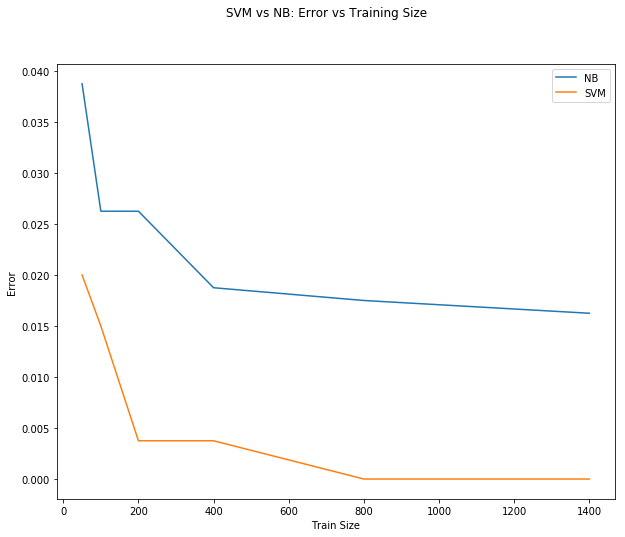

In [157]:
plt.figure()
plt.ylabel('Error')
plt.xlabel('Train Size')
plt.plot(sizes, nb_errors, label='NB')
plt.plot(sizes, svm_errors, label='SVM')
plt.legend(loc='upper right')
plt.suptitle('SVM vs NB: Error vs Training Size')
plt.show()